In [ ]:
%pip install sentence-transformers

In [ ]:
%pip install openai

In [ ]:
import pandas as pd
import openai
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import silhouette_score

In [ ]:
# Set your OpenAI GPT-4 API key
api_key = "INSERTAPIKEY"
openai.api_key = api_key

In [ ]:
# Load the Excel file
excel_file = "/content/data_thread_all.xlsx"  # Update this with your Excel file
df = pd.read_excel(excel_file)

In [ ]:
df.head()

,thread_a,thread_r
0,Error with New version of tesseractOCR add-on ...,"""Members"" group is missing from the dropdown"
1,Portable copy 20 messages,"""Recent activity in my clubs"" bug?"
2,NVDA Reading All Keystrokes 6 messages,"""Safe"" distance between monitor and PC?"
3,Using NVDA remote via an iPhone? 9 messages,"""Test for Ricardo""?"
4,Solution for NVDA Remote on the IPhone with Bl...,"""Too many redirects"""


In [ ]:
df = pd.read_excel(excel_file)

# Initialize the SentenceTransformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # You can choose a different model

# Generate embeddings for thread_a and thread_r
embeddings_a = model.encode(df["thread_a"].tolist(), convert_to_tensor=True)
embeddings_r = model.encode(df["thread_r"].tolist(), convert_to_tensor=True)

# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embedded_a = tsne.fit_transform(embeddings_a)
embedded_r = tsne.fit_transform(embeddings_r)

# Combine the t-SNE points
combined_points = pd.DataFrame({
    'X': list(embedded_a[:, 0]) + list(embedded_r[:, 0]),
    'Y': list(embedded_a[:, 1]) + list(embedded_r[:, 1])
})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

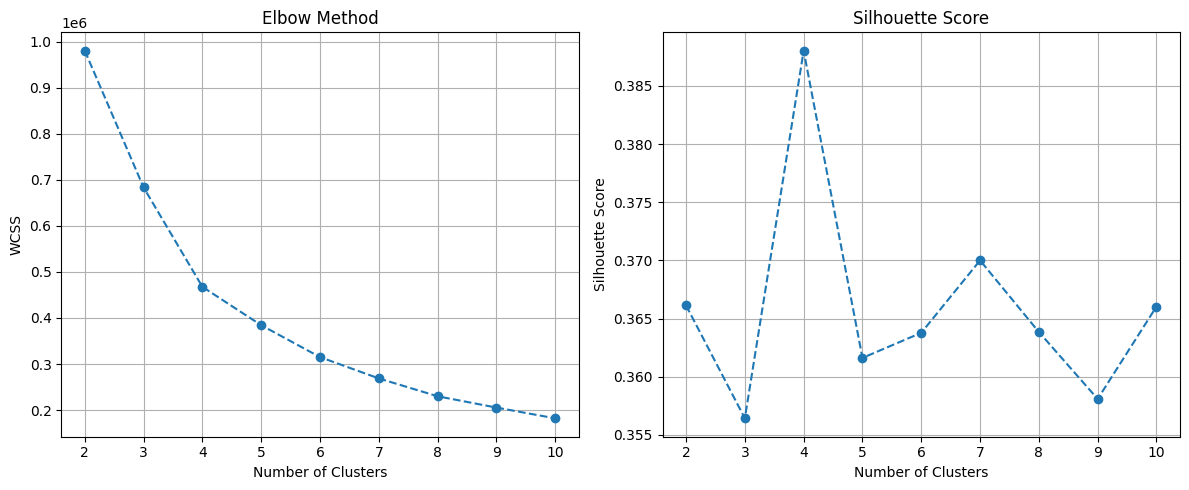

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters based on Silhouette Score: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
for i in range(2, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(combined_points)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(combined_points, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()

# Plot the Silhouette Score graph
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

# Use the Silhouette Score to find the optimal number of clusters
best_silhouette_score = -1
optimal_num_clusters = 2  # Minimum number of clusters

for i in range(2, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_points)
    silhouette_avg = silhouette_score(combined_points, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_num_clusters = i

print(f"Optimal number of clusters based on Silhouette Score: {optimal_num_clusters}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


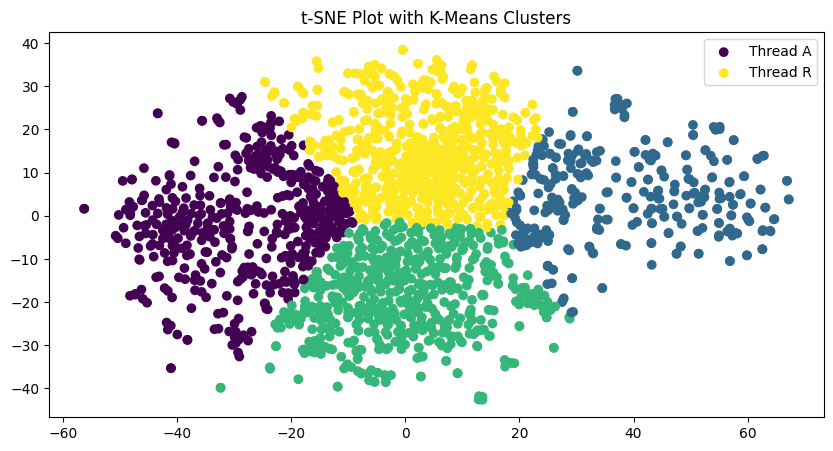

In [ ]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(combined_points)


# Create a t-SNE plot with cluster coloring
plt.figure(figsize=(10, 5))
plt.scatter(embedded_a[:, 0], embedded_a[:, 1], c=cluster_labels[:len(embedded_a)], cmap='viridis', label='Thread A')
plt.scatter(embedded_r[:, 0], embedded_r[:, 1], c=cluster_labels[len(embedded_r):], cmap='viridis', label='Thread R')
plt.legend()
plt.title("t-SNE Plot with K-Means Clusters")

# Save the plot as plot.png
plt.savefig("plot.png")

In [ ]:
%pip install torch

In [ ]:
import pandas as pd
import numpy as np
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import openai
import torch

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

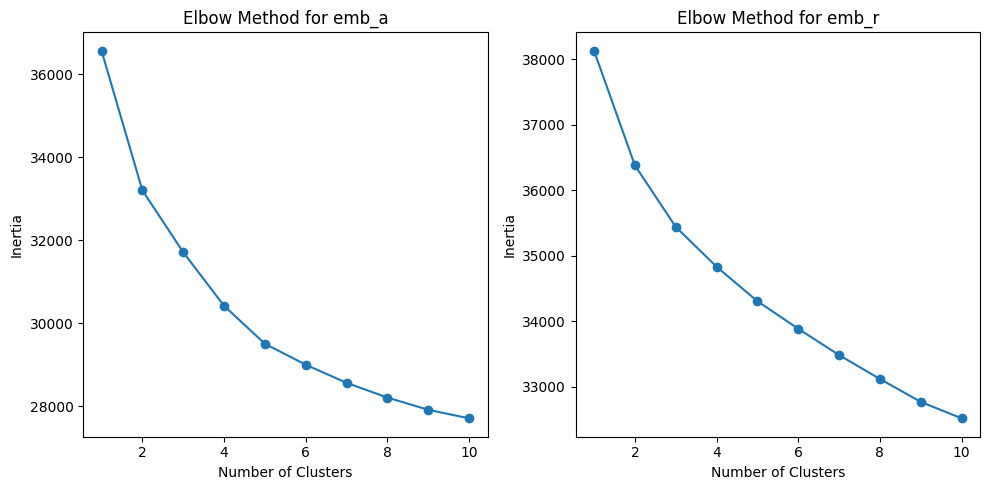

In [ ]:
# Calculate Sentence Transformer embeddings for thread_a and thread_r
emb_a = model.encode(thread_a)
emb_r = model.encode(thread_r)

# Perform K-means clustering
def kmeans_cluster(embeddings, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    return clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to find the optimal number of clusters using the elbow method
def find_optimal_clusters(embeddings):
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        inertias.append(kmeans.inertia_)
    return inertias

inertias_a = find_optimal_clusters(emb_a)
inertias_r = find_optimal_clusters(emb_r)

# Plot the elbow method to determine the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_a, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for emb_a')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), inertias_r, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for emb_r')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


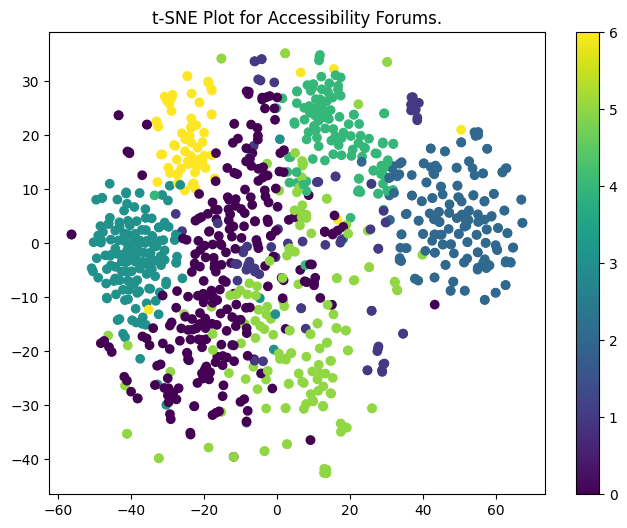

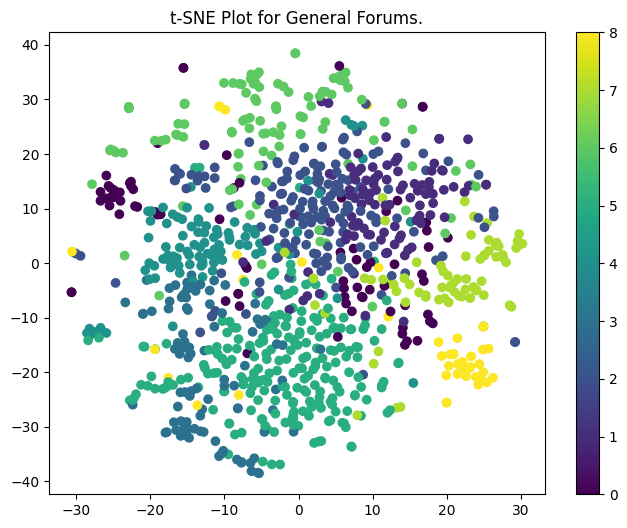

In [ ]:
num_clusters_a = 7  # Adjust to your optimal number of clusters
num_clusters_r = 9  # Adjust to your optimal number of clusters

clusters_a = kmeans_cluster(emb_a, num_clusters_a)
clusters_r = kmeans_cluster(emb_r, num_clusters_r)

# Create t-SNE plots for emb_a and emb_r
def plot_tsne(embeddings, clusters, title):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=clusters, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

plot_tsne(emb_a, clusters_a, 't-SNE Plot for Accessibility Forums.')
plot_tsne(emb_r, clusters_r, 't-SNE Plot for General Forums.')

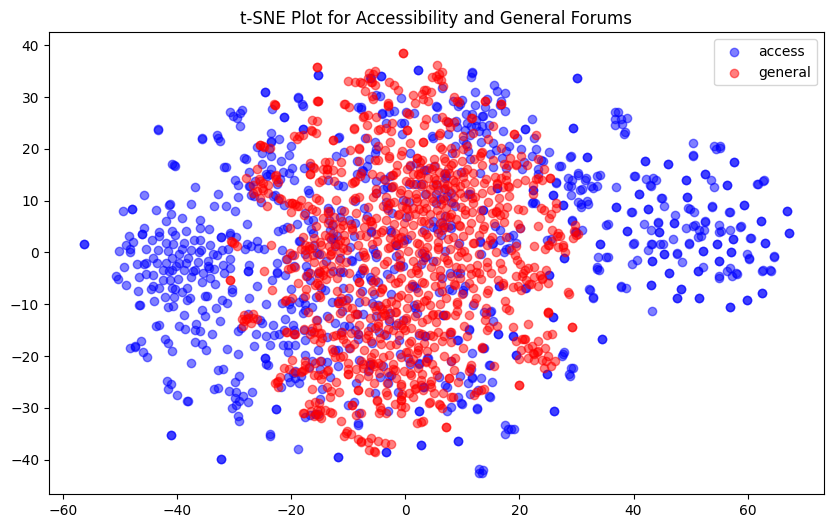

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE for emb_a
tsne_a = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embeddings_a = tsne_a.fit_transform(emb_a)

# Perform t-SNE for emb_r
tsne_r = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embeddings_r = tsne_r.fit_transform(emb_r)

# Create a scatter plot with different colors for emb_a and emb_r
plt.figure(figsize=(10, 6))
plt.scatter(tsne_embeddings_a[:, 0], tsne_embeddings_a[:, 1], c='b', label='access', alpha=0.5)
plt.scatter(tsne_embeddings_r[:, 0], tsne_embeddings_r[:, 1], c='r', label='general', alpha=0.5)

plt.title('t-SNE Plot for Accessibility and General Forums')
plt.legend()
plt.show()

In [ ]:
# Function to generate cluster summaries using GPT-4
def generate_cluster_summaries(embeddings, num_clusters, clusters, thread):
    cluster_summaries = []

    for i in range(num_clusters):
        cluster_indices = np.where(clusters == i)[0]
        cluster_threads = [thread[j] for j in cluster_indices]  # Adjust to your data source
        cluster_threads = '\n'.join(cluster_threads)

        # Reduce the length of the prompt or maximum tokens
        prompt = f"Summarize the following text of clusters to create a topic label or theme. Use exactly 1-2 words in the following. :\n{cluster_threads[:4000]}\nCluster {i + 1}:"  # Adjust the length of the prompt
        response = openai.Completion.create(
            engine="text-davinci-002",
            prompt=prompt,
            max_tokens=5 # Adjust the maximum number of tokens for the label
        )

        summary = response.choices[0].text.strip()
        cluster_summaries.append(summary)

    return cluster_summaries

cluster_summaries_a = generate_cluster_summaries(emb_a, num_clusters_a, clusters_a, thread_a)
cluster_summaries_r = generate_cluster_summaries(emb_r, num_clusters_r, clusters_r, thread_r)

# Print the cluster label summaries
for i, summary in enumerate(cluster_summaries_a):
    print(f"Cluster {i + 1} (emb_a): {summary}")

for i, summary in enumerate(cluster_summaries_r):
    print(f"Cluster {i + 1} (emb_r): {summary}")


Cluster 1 (emb_a): Error with New version of
Cluster 2 (emb_a): Extension installation and downloading
Cluster 3 (emb_a): Weird issues with Skype
Cluster 4 (emb_a): NVDA add-ons
Cluster 5 (emb_a): Jaws 2019 and Desktop
Cluster 6 (emb_a): NVDA Community
Cluster 7 (emb_a): Voices in
Cluster 1 (emb_r): Upgrade issues
Cluster
Cluster 2 (emb_r): Email notifications not
Cluster 3 (emb_r): How to fix
Cluster 4 (emb_r): Updating a computer
Cluster 5 (emb_r): -IP addresses
Cluster 6 (emb_r): GPU issues
Cluster 7 (emb_r): Forum not working properly
Cluster 8 (emb_r): I think my
Cluster 9 (emb_r): Software

Topic:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

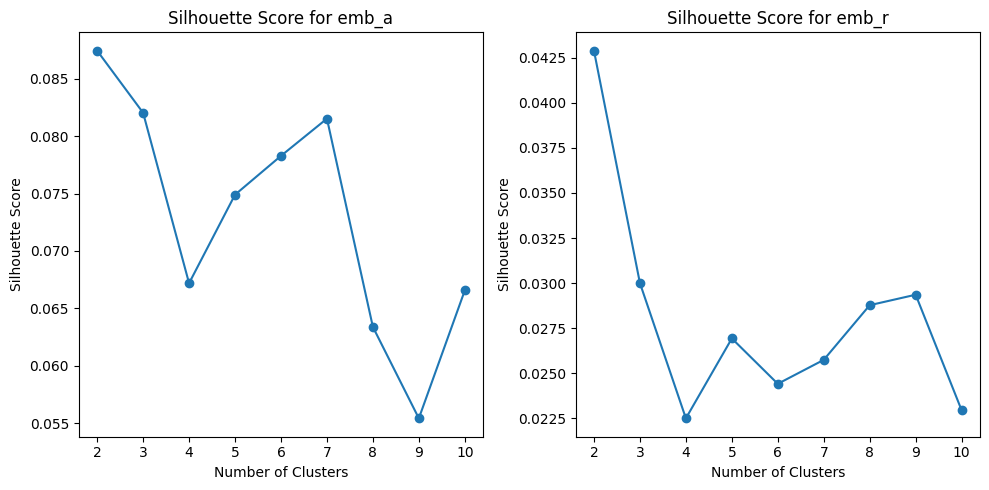

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to find the optimal number of clusters using silhouette score
def find_optimal_clusters_silhouette(embeddings):
    silhouette_scores = []
    for k in range(2, 11):  # Start from 2 clusters as silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(embeddings)
        silhouette_avg = silhouette_score(embeddings, clusters)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

silhouette_scores_a = find_optimal_clusters_silhouette(emb_a)
silhouette_scores_r = find_optimal_clusters_silhouette(emb_r)

# Plot the silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores_a, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for emb_a')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_r, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for emb_r')

plt.tight_layout()
plt.show()